    * Import thư viện
    

In [153]:

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree



    PHẦN 1: TÌM HIỂU VÀ XỬ LÝ DỮ LIỆU 

    1.	Đọc File dữ liệu trong thư mục dữ liệu. Hiển thị toàn bộ dữ liệu của file dữ liệu đã đọc. Tìm hiểu và giải thích về bộ dữ liệu. Cho biết file này lưu trữ dữ liệu gì, biến nào là định tính, biến nào là định lượng, kiểu dữ liệu cho mỗi thuộc tính.

In [154]:
# Đọc file dữ liệu
df = pd.read_csv('dataCar.csv')

# Hiển thị toàn bộ dữ liệu
print(df)


          Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driv

    *Xác định biến nào là biến định tính, biến nào là biến định lượng
* Biến định tính:
- Make, Model, Engine Fuel Type, Transmission Type, Driven_Wheels, Market Category, Vehicle Size, Vehicle Style
* Biên định lượng:
- Year, Engine HP, Engine Cylinders, Number of Doors, highway MPG, city mpg, Popularity, MSRP.

In [155]:
# Xem kiểu dữ liệu của từng cột
print(df.dtypes)

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


    
    2.	Viết lệnh kiểm tra dữ liệu đã sạch chưa? Nếu chưa sạch bạn hãy thực hiện các lệnh làm sạch dữ liệu. Xem lại dữ liệu sau khi làm sạch. 

In [156]:
# Kiểm tra dữ liệu có bị thiếu hay không
print(df.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [157]:
# Làm sạch dữ liệu: loại bỏ các hàng có giá trị null
data_cleaned = df.dropna()

In [158]:

# Xem lại dữ liệu sau khi làm sạch
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8084 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8084 non-null   object 
 1   Model              8084 non-null   object 
 2   Year               8084 non-null   int64  
 3   Engine Fuel Type   8084 non-null   object 
 4   Engine HP          8084 non-null   float64
 5   Engine Cylinders   8084 non-null   float64
 6   Transmission Type  8084 non-null   object 
 7   Driven_Wheels      8084 non-null   object 
 8   Number of Doors    8084 non-null   float64
 9   Market Category    8084 non-null   object 
 10  Vehicle Size       8084 non-null   object 
 11  Vehicle Style      8084 non-null   object 
 12  highway MPG        8084 non-null   int64  
 13  city mpg           8084 non-null   int64  
 14  Popularity         8084 non-null   int64  
 15  MSRP               8084 non-null   int64  
dtypes: float64(3), int64(5), obj

    PHẦN 2: PHÂN TÍCH VÀ DỰ ĐOÁN 

    1.	Thực hiện hồi quy tuyến tính từ Scikit-learn (dùng hàm LinearRegression()) cho trường hợp 1 biến. Giải thích kết quả, viết phương trình hồi quy tuyến tính, vẽ biểu đồ thể hiện mối tương quan giữa biến độc lập và biến phụ thuộc.

Hệ số hồi quy (slope): [-2.50312346]
Intercept: 53930.42940467987
Phương trình hồi quy tuyến tính: MSRP = 53930.43 + -2.50 *Popularity 


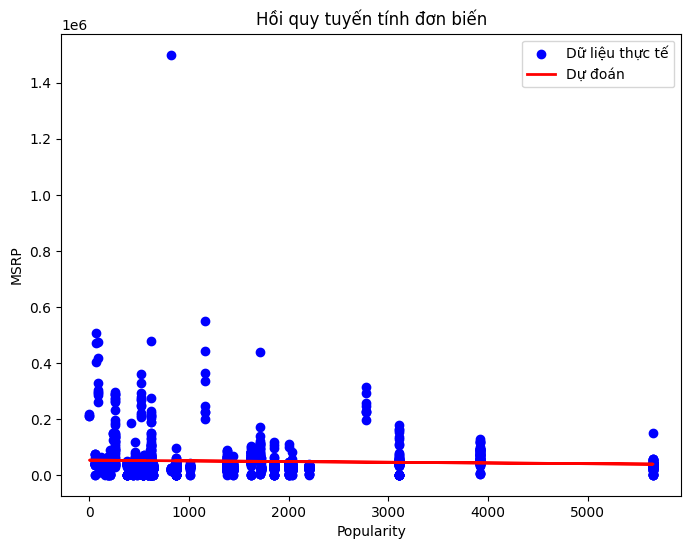

In [159]:
# Chuẩn bị dữ liệu
X = data_cleaned[['Popularity']] 
y = data_cleaned['MSRP']  

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán giá trị trên tập kiểm tra
y_pred = model.predict(X_test)

# In hệ số hồi quy và intercept
print("Hệ số hồi quy (slope):", model.coef_)
print("Intercept:", model.intercept_)

# Phương trình hồi quy tuyến tính
print(f"Phương trình hồi quy tuyến tính: MSRP = {model.intercept_:.2f} + {model.coef_[0]:.2f} *Popularity ")
# Vẽ biểu đồ thể hiện mối tương quan giữa biến độc lập và biến phụ thuộc
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Dữ liệu thực tế')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Dự đoán')
plt.xlabel('Popularity')
plt.ylabel('MSRP')
plt.title('Hồi quy tuyến tính đơn biến')
plt.legend()
plt.show()

    *Giải thích:
- Mô hình hồi quy tuyến tính được huấn luyện trên dữ liệu 'dataCar.csv' với biến độc lập là 'Popularity' và biến phụ thuộc là 'MSRP'.
- Kết quả bao gồm hệ số hồi quy (slope) và intercept, cho phép chúng ta xây dựng phương trình hồi quy tuyến tính.
- Biểu đồ thể hiện mối tương quan giữa 'Popularity' và 'MSRP', với dữ liệu thực tế và đường hồi quy dự đoán.

    2.	Thực hiện hồi quy tuyến tính bằng phương pháp StaSmodels (Dùng hàm OLS()) cho trường hợp 2 biến. Giải thích kết quả, viết phương trình hồi quy tuyến tính, vẽ biểu đồ thể hiện mối tương quan giữa biến độc lập và biến phụ thuộc.

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     3139.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:44:03   Log-Likelihood:                -99368.
No. Observations:                8084   AIC:                         1.987e+05
Df Residuals:                    8081   BIC:                         1.988e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.487e+04   1621.940    -33.832      0.0

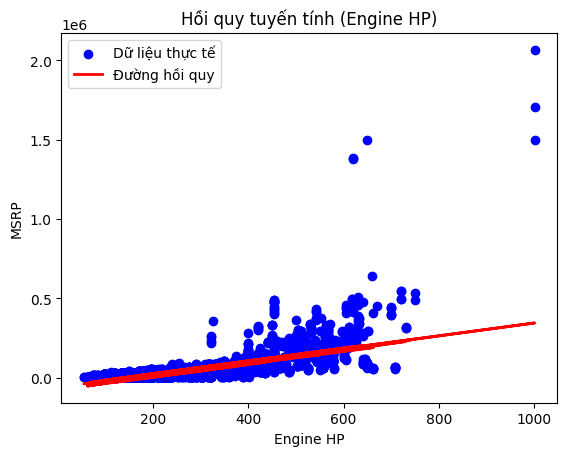

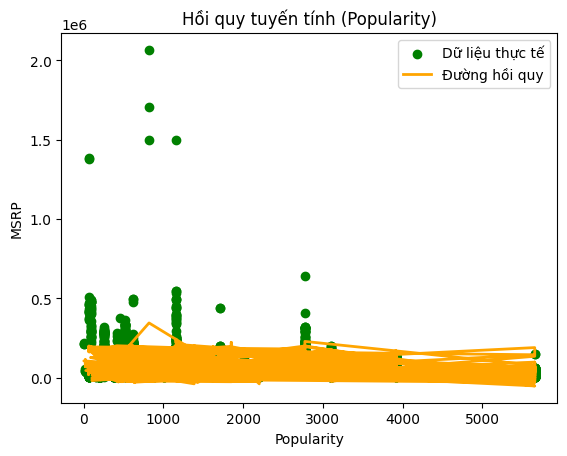

Phương trình hồi quy tuyến tính: MSRP = -54874.21 + 403.17 * Engine HP + -3.86 * Popularity


In [160]:
# Chuẩn bị dữ liệu
X = data_cleaned[['Engine HP', 'Popularity']] 
y = data_cleaned['MSRP']  
X = sm.add_constant(X)

# Khởi tạo và huấn luyện mô hình OLS
model = sm.OLS(y, X)
results = model.fit()

# In kết quả hồi quy
print(results.summary())

# Trích xuất các hệ số
intercept = results.params['const']
coef_engine_hp = results.params['Engine HP']
coef_popularity = results.params['Popularity']

# Vẽ biểu đồ 
# Biểu đồ cho 'Engine HP'
plt.scatter(data_cleaned['Engine HP'], y, color='blue', label='Dữ liệu thực tế')
plt.plot(data_cleaned['Engine HP'], results.predict(), color='red', linewidth=2, label='Đường hồi quy')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('Hồi quy tuyến tính (Engine HP)')
plt.legend()
plt.show()

# Biểu đồ cho 'Popularity'
plt.scatter(data_cleaned['Popularity'], y, color='green', label='Dữ liệu thực tế')
plt.plot(data_cleaned['Popularity'], results.predict(), color='orange', linewidth=2, label='Đường hồi quy')
plt.xlabel('Popularity')
plt.ylabel('MSRP')
plt.title('Hồi quy tuyến tính (Popularity)')
plt.legend()
plt.show()


# In phương trình hồi quy
print(f"Phương trình hồi quy tuyến tính: MSRP = {intercept:.2f} + {coef_engine_hp:.2f} * Engine HP + {coef_popularity:.2f} * Popularity")

    *Giải thích:
- Hệ số (coef_engine_hp) của 'Engine HP' thể hiện sự thay đổi trung bình của MSRP khi 'Engine HP' tăng thêm một đơn vị, giả sử 'Popularity' và các biến khác không đổi.
- Hệ số (coef_popularity) của 'Popularity' thể hiện sự thay đổi trung bình của MSRP khi 'Popularity' tăng thêm một đơn vị, giả sử 'Engine HP' và các biến khác không đổi.
- Hệ số (coefficient) của 'Engine HP' thể hiện sự thay đổi trung bình của giá bán (MSRP) khi công suất động cơ (Engine HP) tăng thêm một đơn vị, giả sử các biến khác không đổi. 
- Nếu hệ số dương, nghĩa là công suất động cơ tăng thì giá bán có xu hướng tăng. Ngược lại, nếu hệ số âm thì công suất động cơ tăng, giá bán có xu hướng giảm (điều này không hợp lý trong ngữ cảnh này).
- Intercept là giá trị dự đoán của MSRP khi Engine HP bằng 0. Trong trường hợp này, intercept không mang ý nghĩa thực tế nhiều vì không có xe nào có công suất động cơ bằng 0.
- Biểu đồ thể hiện mối quan hệ giữa Engine HP và MSRP. Đường hồi quy là đường thẳng tốt nhất biểu diễn mối quan hệ tuyến tính giữa hai biến này. Các điểm dữ liệu phân tán xung quanh đường hồi quy cho thấy mức độ phù hợp của mô hình.
-Các chỉ số thống kê (như R-squared) trong kết quả `results.summary()` (nếu có) sẽ đánh giá độ chính xác của mô hình. R-squared càng gần 1, mô hình càng phù hợp với dữ liệu.


    3.	Xây dựng 1 bài toán phân lớp (Classification). Đánh giá độ chính xác bằng phương pháp Confusion Matrix, giải thích kết quả, vẽ biểu đồ tương ứng. 

Confusion Matrix:
[[253   0 142]
 [  0 281 103]
 [ 30  68 740]]

Classification Report:
              precision    recall  f1-score   support

         Cao       0.89      0.64      0.75       395
        Thấp       0.81      0.73      0.77       384
  Trung bình       0.75      0.88      0.81       838

    accuracy                           0.79      1617
   macro avg       0.82      0.75      0.77      1617
weighted avg       0.80      0.79      0.79      1617



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17232\1778665796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Price_Category'] = pd.cut(data_cleaned['MSRP'], bins=[0, 25000, 50000, data_cleaned['MSRP'].max()], labels=['Thấp', 'Trung bình', 'Cao'])


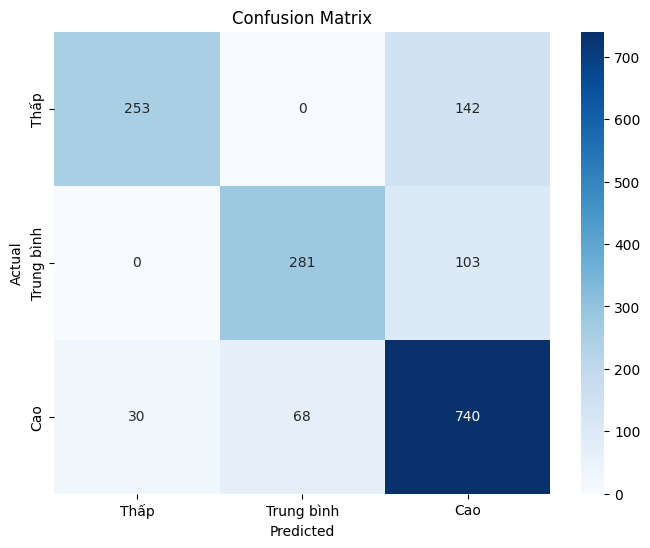

In [161]:
# Chia MSRP thành 3 nhóm: Thấp, Trung bình, Cao
data_cleaned['Price_Category'] = pd.cut(data_cleaned['MSRP'], bins=[0, 25000, 50000, data_cleaned['MSRP'].max()], labels=['Thấp', 'Trung bình', 'Cao'])


# Chọn các đặc trưng (features) và biến mục tiêu (target variable)
X = data_cleaned[['Popularity', 'Engine HP', 'highway MPG']]  # Ví dụ chọn 3 đặc trưng
y = data_cleaned['Price_Category']  # Biến mục tiêu là nhóm giá

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sử dụng mô hình Logistic Regression (có thể thay thế bằng các mô hình khác như Naive Bayes, SVM,...)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình bằng Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# In Confusion Matrix
print("Confusion Matrix:")
print(cm)

# In báo cáo phân loại
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Thấp', 'Trung bình', 'Cao'], yticklabels=['Thấp', 'Trung bình', 'Cao'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

    *Giải thích kết quả:
- Confusion Matrix thể hiện số lượng dự đoán đúng và sai cho từng nhóm giá.
- Độ chính xác tổng thể của mô hình được thể hiện trong classification_report.
- Các chỉ số khác như precision, recall, F1-score cung cấp thông tin chi tiết về hiệu suất của mô hình đối với từng nhóm giá.


    4.	Xây dựng 1 bài toán phân lớp (Classification) bằng thuật toán Navie Bayes. Giải thích kết quả. Kiểm thử với 1 mẫu dữ liệu cụ thể.
    

Naive Bayes - Confusion Matrix:
[[234   3 158]
 [  0 285  99]
 [ 25 144 669]]

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

         Cao       0.90      0.59      0.72       395
        Thấp       0.66      0.74      0.70       384
  Trung bình       0.72      0.80      0.76       838

    accuracy                           0.73      1617
   macro avg       0.76      0.71      0.72      1617
weighted avg       0.75      0.73      0.73      1617



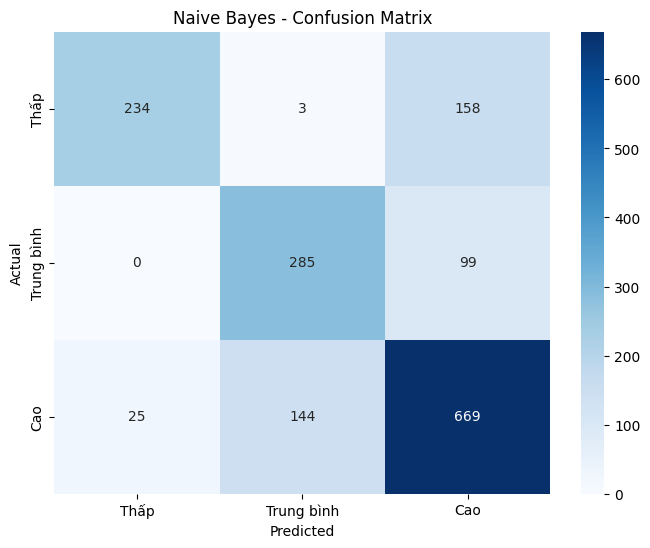


Mẫu dữ liệu mới: Popularity = 1000, Engine HP = 200, highway MPG = 30
Nhóm giá dự đoán: Thấp


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [162]:

# Sử dụng mô hình Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
nb_y_pred = nb_model.predict(X_test)

# Đánh giá mô hình bằng Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

# In Confusion Matrix
print("Naive Bayes - Confusion Matrix:")
print(nb_cm)

# In báo cáo phân loại
print("\nNaive Bayes - Classification Report:")
print(classification_report(y_test, nb_y_pred))

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Thấp', 'Trung bình', 'Cao'], yticklabels=['Thấp', 'Trung bình', 'Cao'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

# Kiểm thử với một mẫu dữ liệu cụ thể
# Ví dụ: Một chiếc xe có Popularity = 1000, Engine HP = 200, highway MPG = 30
new_data = [[1000, 200, 30]]
new_data_scaled = scaler.transform(new_data)  
predicted_category = nb_model.predict(new_data_scaled)
print(f"\nMẫu dữ liệu mới: Popularity = 1000, Engine HP = 200, highway MPG = 30")
print(f"Nhóm giá dự đoán: {predicted_category[0]}")



    *Giải thích kết quả:
- Confusion Matrix thể hiện số lượng dự đoán đúng và sai cho từng nhóm giá của mô hình Naive Bayes.
- Độ chính xác tổng thể của mô hình được thể hiện trong classification_report.
- Các chỉ số khác như precision, recall, F1-score cung cấp thông tin chi tiết về hiệu suất của mô hình đối với từng nhóm giá.
- Kết quả dự đoán cho mẫu dữ liệu mới cho thấy nhóm giá dự đoán dựa trên các thuộc tính đã nhập.

    5.	Sử dụng thuật toán K-Mean cho 1 ví dụ phân nhóm dữ liệu theo một tiêu chí nào đó trong tập dữ liệu đã cho. Đánh giá kết quả của thuật toán. Kiểm thử với 1 mẫu dữ liệu cụ thể. Giải thích kết quả

Số lượng cụm tối ưu (k): 5


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17232\3039096846.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = kmeans.labels_


Silhouette Score: 0.4300967100764271


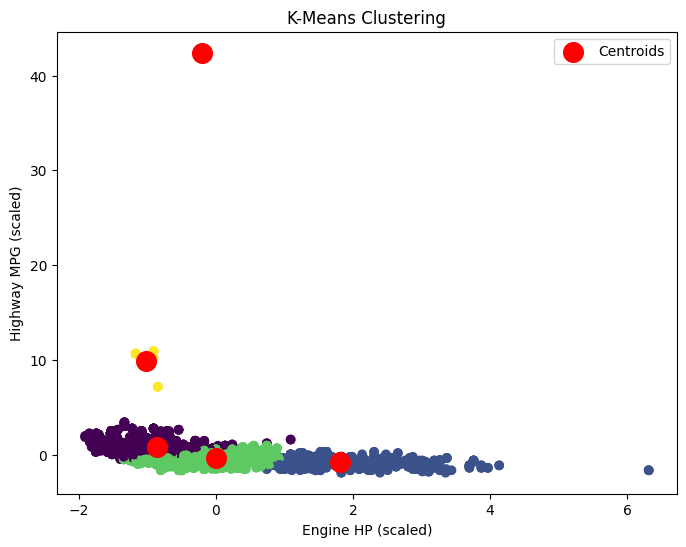


Mẫu dữ liệu mới: Engine HP = 200, Highway MPG = 30
Cụm dự đoán: 0


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [163]:
# Chọn các đặc trưng cho thuật toán K-Means
features = data_cleaned[['Engine HP', 'highway MPG']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Tìm số lượng cụm tối ưu (k) bằng phương pháp Silhouette
k_range = range(2, 10) 
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Số lượng cụm tối ưu (k): {optimal_k}")

# Áp dụng K-Means với số cụm tối ưu
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

# Gán nhãn cụm cho dữ liệu
data_cleaned['Cluster'] = kmeans.labels_

# Đánh giá kết quả bằng Silhouette Score
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Trực quan hóa kết quả
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Engine HP (scaled)')
plt.ylabel('Highway MPG (scaled)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Kiểm thử với một mẫu dữ liệu cụ thể
new_data = [[200, 30]] # ví dụ: Engine HP = 200, Highway MPG = 30
new_data_scaled = scaler.transform(new_data)
predicted_cluster = kmeans.predict(new_data_scaled)
print(f"\nMẫu dữ liệu mới: Engine HP = 200, Highway MPG = 30")
print(f"Cụm dự đoán: {predicted_cluster[0]}")


    * Giải thích kết quả:
- Đầu tiên, mã tìm kiếm số cụm tối ưu (k) bằng cách tính Silhouette Score cho các giá trị k khác nhau. Silhouette Score đánh giá chất lượng của các cụm. Giá trị càng cao, chất lượng các cụm càng tốt.
- Tiếp theo, K-Means được thực hiện với giá trị k tối ưu. Kết quả là mỗi điểm dữ liệu được gán vào một cụm.
- Hình ảnh trực quan hóa kết quả cho thấy sự phân bố của các điểm dữ liệu vào từng cụm, cùng với vị trí của các tâm cụm.
- Silhouette Score chung của thuật toán cũng được tính và hiển thị, cho biết mức độ tốt của các cụm.
- Cuối cùng, mã kiểm tra với một mẫu dữ liệu mới và dự đoán cụm mà mẫu dữ liệu đó thuộc về.

    6.	Sử dụng mô hình Decision Tree cho 1 ví dụ để dự đoán đưa ra các quyết định tương ứng. Vẽ biểu đồ biểu diễn cây quyết định đó.

Decision Tree - Confusion Matrix:
[[350   1  44]
 [  1 341  42]
 [ 37  41 760]]

Decision Tree - Classification Report:
              precision    recall  f1-score   support

         Cao       0.90      0.89      0.89       395
        Thấp       0.89      0.89      0.89       384
  Trung bình       0.90      0.91      0.90       838

    accuracy                           0.90      1617
   macro avg       0.90      0.89      0.90      1617
weighted avg       0.90      0.90      0.90      1617



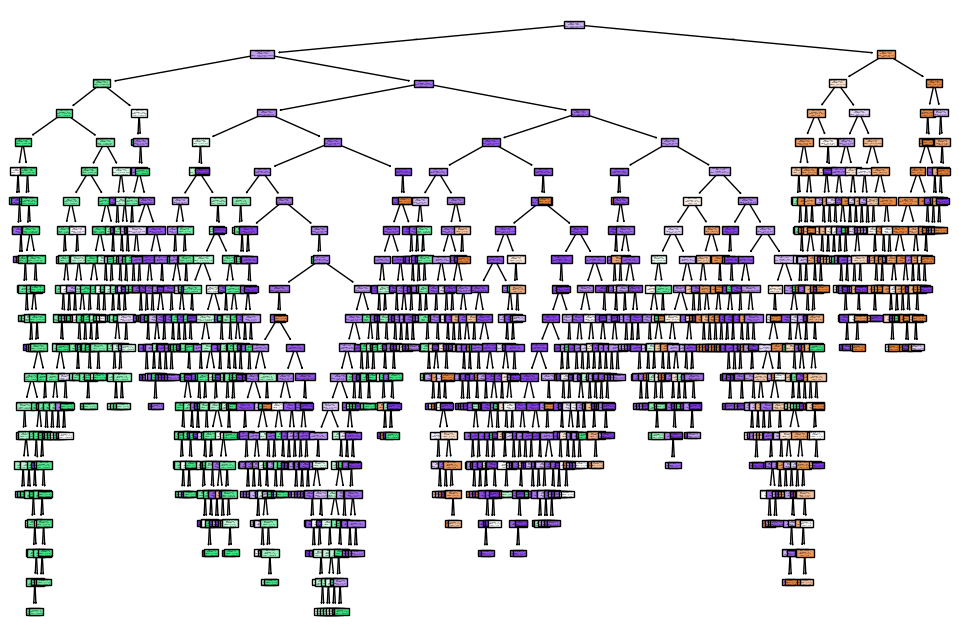


Mẫu dữ liệu mới: Popularity = 1000, Engine HP = 200, highway MPG = 30
Nhóm giá dự đoán: Cao


In [166]:
# Sử dụng mô hình Decision Tree

dt_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
dt_y_pred = dt_model.predict(X_test)

# Đánh giá mô hình (tương tự như các mô hình trước đó)
dt_cm = confusion_matrix(y_test, dt_y_pred)
print("Decision Tree - Confusion Matrix:")
print(dt_cm)
print("\nDecision Tree - Classification Report:")
print(classification_report(y_test, dt_y_pred))


# Vẽ cây quyết định
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=['Popularity', 'Engine HP', 'highway MPG'], class_names=['Thấp', 'Trung bình', 'Cao'], filled=True)
plt.show()

# Kiểm thử với một mẫu dữ liệu cụ thể
new_data = [[1000, 200, 30]] # Popularity, Engine HP, highway MPG
predicted_category = dt_model.predict(new_data)
print(f"\nMẫu dữ liệu mới: Popularity = 1000, Engine HP = 200, highway MPG = 30")
print(f"Nhóm giá dự đoán: {predicted_category[0]}")